# Exercise 1
(a) Consider the nonlinear equation:

$$
f(x) = -cos(x) + x^3 + 2x^2 + 1 = 0
$$

In [21]:
import numpy as np
def function(x):
    # Define function f(x) = -cos(x) + x**3 + 2*x**2 + 1
    return (-np.cos(x) + x**3 + 2*x**2 + 1)

def dfunction(x):
    # Define derivative of function f'(x) = sin(x) + 3*x**2 + 4*x
    return (np.sin(x) + 3*x**2 + 4*x)

To consider how many real solution the function has in the interval $x \in [-3, 1]$, the function can be plotted:

Text(0, 0.5, 'f(x)')

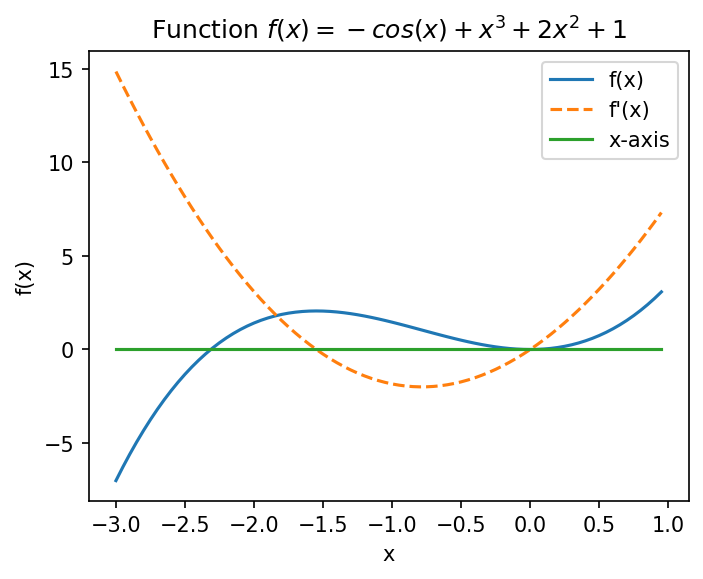

In [22]:
from matplotlib import pyplot as plt


x=np.arange(-3, 1, 0.05)
y=function(x)
dy = dfunction(x)
#fig, axes = plt.subplots(1, , figsize=(12, 5), dpi=150, constrained_layout=True)
fig=plt.figure(figsize=(4, 3), dpi=150)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,dy,'--')
ax.plot(x,0*y)
ax.set_title('Function $f(x) = -cos(x) + x^3 + 2x^2 + 1$')
ax.legend(['f(x)', "f'(x)", 'x-axis'])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

It can be seen from the plot that the function has two real solutions in the interval $x \in [-3.0, 1.0]$. The first solution is clearly at $x = 0$, the second is in the interval $x \in [-2.5, 2.0]$.

(b) i. At $x = 0$ the function is equal to zero and its derivative is also equal to zero so the order of convergence is linear. At the second root, the derivative of the function is not equal to zero so the order of convergence is quadratic.

In [23]:
def myNewton(fnon, dfdx, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # dfdx     - name of the derivative function df(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    f = eval(fnon)(x,*fnonargs)

    print(' k  xk          f(xk)')

    # Main Newton loop
    while (abs(f) > tol and k < maxk):
        # Evaluate function derivative
        d = eval(dfdx)(x,*fnonargs)

        # Take Newton step
        x = x - f/d
        f = eval(fnon)(x,*fnonargs)
        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, x, abs(f)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

(b) ii. Implementing the Newton method as set out in the lecture notes, three roots can be found due to the solver converging either from the left of the right of the root at $x = 0$.

For an initial guess $x_0 = -2$:

In [39]:
myNewton('function', 'dfunction', -2, 1e-6, 100)

 k  xk          f(xk)
 1  -2.45819577  9.93e-01
 2  -2.32858671  9.44e-02
 3  -2.31342784  1.22e-03
 4  -2.31322658  2.14e-07
Converged


In [49]:
q = np.log((1/0.5)*abs(-2.31322658 - -2.31342784))/np.log(abs(-2.31322658 - -2.32858671))
print(q)

1.8720792744721035


For an initial guess of $x_0 = -1$:

In [41]:
myNewton('function', 'dfunction', -1, 1e-6, 100)

 k  xk          f(xk)
 1  -0.20731974  9.85e-02
 2  -0.09865838  2.34e-02
 3  -0.04828574  5.72e-03
 4  -0.02390178  1.41e-03
 5  -0.01189281  3.52e-04
 6  -0.00593215  8.78e-05
 7  -0.00296254  2.19e-05
 8  -0.00148039  5.48e-06
 9  -0.00073998  1.37e-06
10  -0.00036993  3.42e-07
Converged


In [48]:
q = np.log((1/0.5)*abs(-0.00036993))/np.log(abs(-0.00076998))
print(q)

1.0055660132011035


For an initial guess of $x_0 = 1$:

In [42]:
myNewton('function', 'dfunction', 1, 1e-6, 100)

 k  xk          f(xk)
 1  0.55879481  9.51e-01
 2  0.30188833  2.55e-01
 3  0.15848656  6.67e-02
 4  0.08150846  1.71e-02
 5  0.04138345  4.35e-03
 6  0.02085827  1.10e-03
 7  0.01047203  2.75e-04
 8  0.00524690  6.90e-05
 9  0.00262619  1.73e-05
10  0.00131379  4.32e-06
11  0.00065707  1.08e-06
12  0.00032858  2.70e-07
Converged


In [46]:
q = np.log((1/0.5)*abs(-0.00032858))/np.log(abs(-0.00065707))
print(q)

0.9999813090118127


It can be seen from the from the iterations for the three initial guesses that the solver converges to the root a $x = 0$ slower than the root at $x \approx -2.31$. The order of convergence can be approximated by assuming $\alpha = 0.5$ and calculating q from the last iteration. The order of convergence for the root at $x = 0$ is 1.0 and the order of convergence for the root at $x \approx -2.31$ is approximately 1.9.

(b) iii. Finding the root using the bisection method is possible for the simple root. However it cannot find the root at $x = 0$ as the function does not change sign across an interval containing that root that does not also include the simple root. Therefore the bracket condition cannot be satisfied.

### (c) Dekkers Algorithm


In [25]:
from math import copysign

def dekker(fnon, xbounds, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # xbounds  - initial bracket [xL, xR]
    # tol      - stopping tolerance
    # maxk     - maximum number of iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)

    k = 0
    iterates = []
    a, b = xbounds
    print(' k  xk          f(xk)')
    bprev = a
    fb = eval(fnon)(bprev,*fnonargs)

    # Main bisection loop
    while (abs(fb) > tol and k < maxk): #update

        fa = eval(fnon)(a,*fnonargs)
        fb = eval(fnon)(bprev,*fnonargs)
        fbprev = eval(fnon)(b,*fnonargs)

        #Bisection
        m = (bprev + b) / 2    

        #Implement secant method
        if (fb == fbprev):
            s = m
        else:
            s = b - fb*(b - bprev)/(fb - fbprev)

        print(s)
        #If result of the secant method is in the range of bisection and the current value of b, set b to be the secant result. Otherwise use the bisection.
        if (m < s < b):
            bnew = s
        else:
            bnew = m

        fbnew = eval(fnon)(bprev,*fnonargs)

        if (copysign(1,fa) != copysign(1,fbnew)):
            a = a
        else:
            a = b
        
        fa = eval(fnon)(a,*fnonargs)
                
        if (abs(fa) < abs(fbnew)):
            a, bnew = bnew, a
        
        b = bnew
        fb = eval(fnon)(b,*fnonargs)

        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, b, abs(fb)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

    return iterates;

In [26]:
xb = (-1, 0.5)
dekker('function', xb, 1e-6, 100)

 k  xk          f(xk)
-2.5739958361690802
 1  0.50000000  7.47e-01
-2.5739958361690802
 2  0.50000000  7.47e-01
-2.5739958361690802
 3  0.50000000  7.47e-01
-2.5739958361690802
 4  0.50000000  7.47e-01
-2.5739958361690802
 5  0.50000000  7.47e-01
-2.5739958361690802
 6  0.50000000  7.47e-01
-2.5739958361690802
 7  0.50000000  7.47e-01
-2.5739958361690802
 8  0.50000000  7.47e-01
-2.5739958361690802
 9  0.50000000  7.47e-01
-2.5739958361690802
10  0.50000000  7.47e-01
-2.5739958361690802
11  0.50000000  7.47e-01
-2.5739958361690802
12  0.50000000  7.47e-01
-2.5739958361690802
13  0.50000000  7.47e-01
-2.5739958361690802
14  0.50000000  7.47e-01
-2.5739958361690802
15  0.50000000  7.47e-01
-2.5739958361690802
16  0.50000000  7.47e-01
-2.5739958361690802
17  0.50000000  7.47e-01
-2.5739958361690802
18  0.50000000  7.47e-01
-2.5739958361690802
19  0.50000000  7.47e-01
-2.5739958361690802
20  0.50000000  7.47e-01
-2.5739958361690802
21  0.50000000  7.47e-01
-2.5739958361690802
22  0.5000000

[]